# Insurance Fraud Detection Using Gradient Boosting Algorithm
Insurance fraud poses a persistent threat to insurers, necessitating advanced detection methods. Leveraging **Gradient Boosting Classifier** (GBC), this study aims to enhance fraud detection efficacy in insurance claims. GBC, a robust ensemble learning algorithm, excels in uncovering complex fraud patterns within heterogeneous datasets. This paper explores GBC's application in insurance fraud detection, addressing challenges such as imbalanced data and evolving fraud tactics. Through empirical analysis, we demonstrate GBC's effectiveness in minimizing false positives while adapting to emerging fraud schemes. By harnessing the power of GBC, insurers can bolster their fraud detection capabilities, safeguarding financial assets and maintaining trust in the insurance industry.

# Import Needed Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

# Explore the data set

In [2]:
insurance=pd.read_excel("insurance_prediction.xlsx")

In [3]:
insurance.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N


In [4]:
insurance .dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [5]:
insurance.shape

(1000, 39)

In [8]:
def nunique_all_columns(insurance):
    return insurance.apply(pd.Series.nunique)

In [91]:
unique_counts = nunique_all_columns(insurance)
print(unique_counts)


months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                         4
police_report_available           2
total_claim_amount          

# Data Pre_processing

In [10]:
insurance["police_report_available"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [11]:
insurance.drop("policy_csl",inplace=True,axis=1)

In [12]:
insurance["insured_sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [13]:
insurance.drop("incident_location",axis=1,inplace=True)

In [14]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

#  Data Analysis and Visualizatio

<Axes: xlabel='fraud_reported', ylabel='Count'>

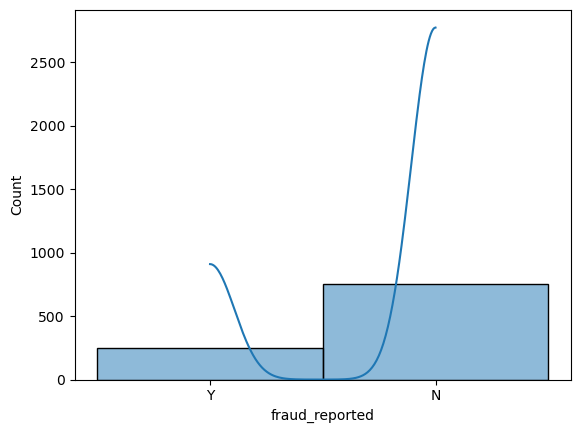

In [15]:
sns.histplot(x=insurance["fraud_reported"],kde=True)

<Axes: xlabel='insured_education_level', ylabel='capital-gains'>

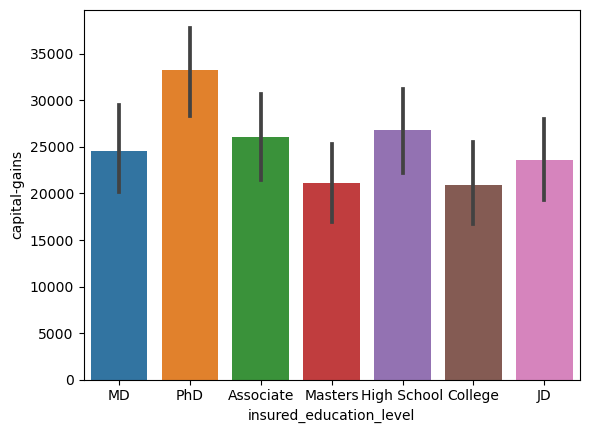

In [16]:
sns.barplot(x=insurance["insured_education_level"],y=insurance["capital-gains"])

Text(0.5, 1.0, 'Vehicle Involved in Accident')

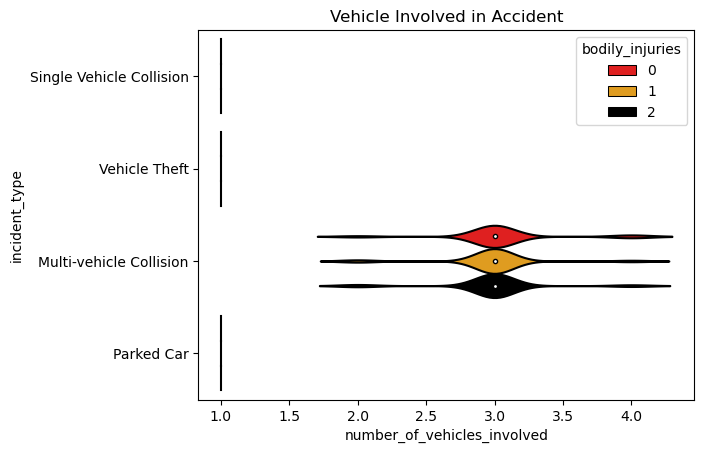

In [21]:
sns.violinplot(x=insurance['number_of_vehicles_involved'],y=insurance['incident_type'],hue=insurance["bodily_injuries"],
               palette=['red','orange','k'])
plt.title("Vehicle Involved in Accident")

Text(0.5, 1.0, 'Insurance Claim')

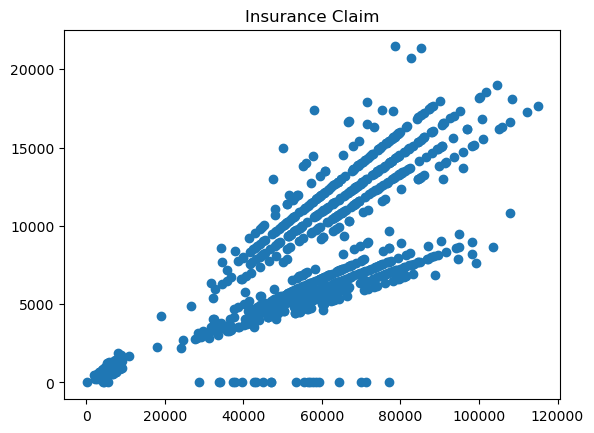

In [22]:
plt.scatter(insurance["total_claim_amount"],insurance["injury_claim"])
plt.title("Insurance Claim")

Text(0.5, 1.0, 'Number of vehicle involved')

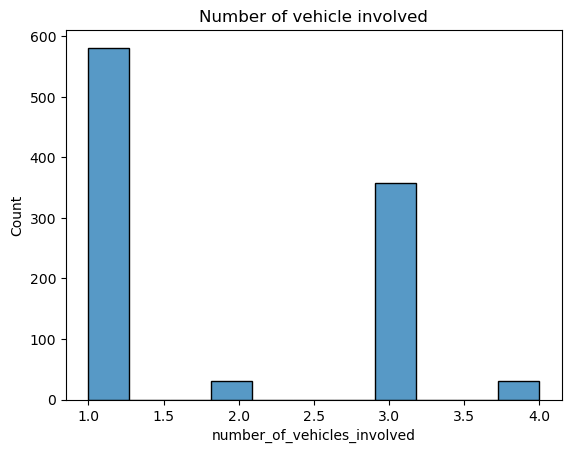

In [23]:
sns.histplot(x=insurance['number_of_vehicles_involved'])
plt.title("Number of vehicle involved")

Text(0.5, 1.0, 'Fraud_report')

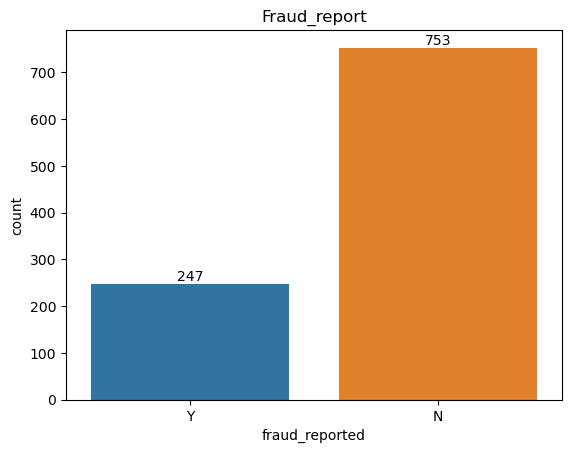

In [24]:
count=sns.countplot(x=insurance['fraud_reported'])
for i in count.containers:
    count.bar_label(i)
plt.title("Fraud_report")

Text(0.5, 1.0, 'Policy State Vs Total Claim Amount')

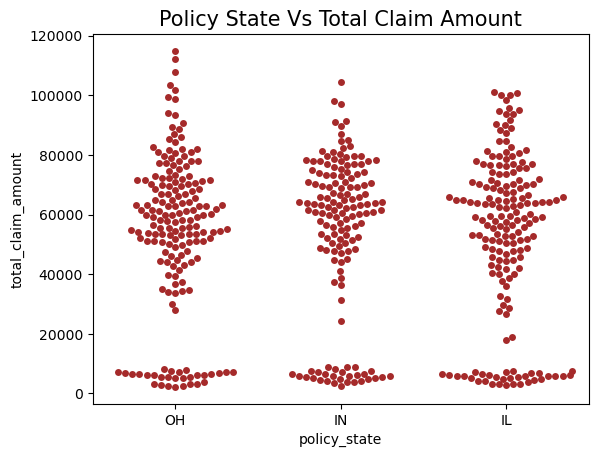

In [25]:
sns.swarmplot(x=insurance["policy_state"].head(500),y=insurance["total_claim_amount"].head(500),color="brown")
plt.title("Policy State Vs Total Claim Amount",fontsize=15)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 2000x500 with 0 Axes>

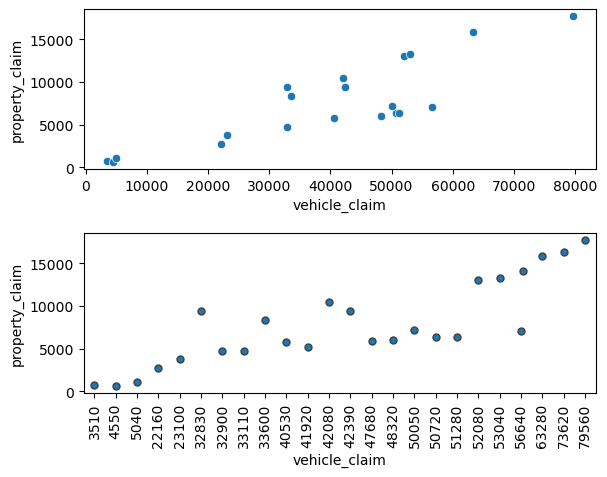

In [94]:
plt.figure(figsize=(20,5))

fig,axes  = plt.subplots(nrows=2,ncols=1)
plt.subplots_adjust(left=0.1,bottom=0.1,top=0.9, 
                    wspace=0.4,hspace=0.4)
sns.scatterplot(y=insurance['property_claim'].head(20),x=insurance['vehicle_claim'].head(20),ax=axes[0])
sns.stripplot(y=insurance['property_claim'].head(25),x=insurance['vehicle_claim'].head(25),linewidth=1,
              ax=axes[1])

plt.xticks(rotation=90)
plt.tight_layout




# Data Cleaning

In [27]:
dic={"N":0,"Y":1}

In [28]:
insurance['fraud_Reported']=insurance['fraud_reported'].map(dic)

In [29]:
insurance.drop('fraud_reported',axis=1,inplace=True)

In [31]:
pd.options.display.max_columns=39

In [32]:
insurance.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_Reported
0,328,48,521585,2014-10-17,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1


In [33]:

insurance =insurance.replace('?',np.NaN)

In [34]:
insurance["property_damage"]

0      YES
1      NaN
2       NO
3      NaN
4       NO
      ... 
995    YES
996    YES
997    NaN
998    NaN
999    NaN
Name: property_damage, Length: 1000, dtype: object

In [35]:
insurance.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [36]:
insurance["property_damage"].unique()

array(['YES', nan, 'NO'], dtype=object)

In [37]:
insurance["property_damage"].value_counts().reset_index()

,index,property_damage
0,NO,338
1,YES,302


In [38]:

insurance["property_damage"].fillna("NO",inplace=True)

In [39]:
insurance["property_damage"].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [40]:
insurance["police_report_available"].fillna("NO",inplace=True)

In [41]:
insurance["collision_type"].nunique()

3

In [42]:
insurance["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [43]:
insurance["collision_type"].fillna(insurance["collision_type"].mode()[0],inplace=True)

In [44]:
insurance["collision_type"].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [45]:
insurance.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [46]:
insurance["incident_date"]

0     2015-01-25
1     2015-01-21
2     2015-02-22
3     2015-01-10
4     2015-02-17
         ...    
995   2015-02-22
996   2015-01-24
997   2015-01-23
998   2015-02-26
999   2015-02-26
Name: incident_date, Length: 1000, dtype: datetime64[ns]

In [47]:
insurance["policy_bind_date"]

0     2014-10-17
1     2006-06-27
2     2000-09-06
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-01-05
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [48]:
def change_to_datetime(columns):
    insurance[columns]=pd.to_datetime(insurance[columns],infer_datetime_format=True)

In [49]:
for i in['policy_bind_date',"incident_date"]:
    change_to_datetime(i)

In [50]:
insurance["policy_bind_Date"]=insurance["policy_bind_date"].dt.day
insurance["policy_bind_month"]=insurance["policy_bind_date"].dt.month

insurance["incident_Date"]=insurance["incident_date"].dt.day
insurance["incident_month"]=insurance["incident_date"].dt.month




In [51]:
insurance.drop("policy_bind_date",inplace=True,axis=1)

In [52]:
insurance.drop("incident_date",inplace=True,axis=1)

In [53]:
insurance["insured_education_level"].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [54]:
insurance["police_report_available"]=insurance["police_report_available"].replace(('YES','NO'),(1,0))

In [55]:
insurance["property_damage"]=insurance["property_damage"].replace(("YES","NO"),(1,0))

In [56]:
insurance["insured_sex"]=insurance["insured_sex"].replace(("MALE","FEMALE"),(1,0))

In [57]:
insurance["insured_occupation"].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [58]:
cat_data= [columns for columns in insurance.columns if insurance[columns].dtypes=='O']

In [59]:
cont_data= [columns for columns in insurance.columns if insurance[columns].dtypes!='O']

In [60]:
cont_data=insurance[cont_data]

In [61]:
cat_data=insurance[cat_data]

In [62]:
cat_data.columns

Index(['policy_state', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'auto_make', 'auto_model'],
      dtype='object')

In [63]:
cat_data=pd.get_dummies(cat_data)

In [65]:
cat_data.dtypes

policy_state_IL                      uint8
policy_state_IN                      uint8
policy_state_OH                      uint8
insured_education_level_Associate    uint8
insured_education_level_College      uint8
                                     ...  
auto_model_Tahoe                     uint8
auto_model_Ultima                    uint8
auto_model_Wrangler                  uint8
auto_model_X5                        uint8
auto_model_X6                        uint8
Length: 133, dtype: object

In [66]:
cat_data.head(5)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,...,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [67]:
cat_data.isnull().sum()

policy_state_IL                      0
policy_state_IN                      0
policy_state_OH                      0
insured_education_level_Associate    0
insured_education_level_College      0
                                    ..
auto_model_Tahoe                     0
auto_model_Ultima                    0
auto_model_Wrangler                  0
auto_model_X5                        0
auto_model_X6                        0
Length: 133, dtype: int64

In [68]:
new_data=pd.concat([cat_data,cont_data],axis=1)

In [69]:
new_data.head(3)

,policy_state_IL,policy_state_IN,policy_state_OH,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,...,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_Reported,policy_bind_Date,policy_bind_month,incident_Date,incident_month
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1,53300,0,5,1,1,1,2,1,71610,6510,13020,52080,2004,1,17,10,25,1
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,8,1,0,0,0,0,5070,780,780,3510,2007,1,27,6,21,1
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,35100,0,7,3,0,2,3,0,34650,7700,3850,23100,2007,0,6,9,22,2


In [70]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 159 entries, policy_state_IL to incident_month
dtypes: float64(1), int64(25), uint8(133)
memory usage: 333.1 KB


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
features=new_data.drop("fraud_Reported",axis=1)

In [74]:
target=new_data["fraud_Reported"]

In [76]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test.shape)



(800, 158)
(200, 158)
197    0
47     1
614    0
715    1
151    0
      ..
550    0
932    0
444    0
719    0
687    0
Name: fraud_Reported, Length: 800, dtype: int64
(200,)


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix

Score 0.975
Accuracy: 0.8
Mean Squared Error: 0.2
Mean Absolute Error: 0.2
[[119  28]
 [ 12  41]]


<Axes: >

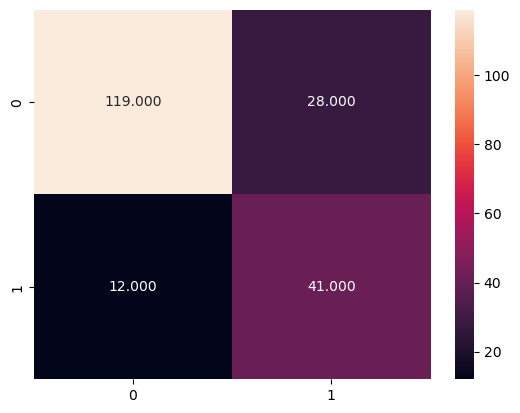

In [83]:
Gradi=GradientBoostingClassifier()
Gradi.fit(X_train,y_train)
y_pred=Gradi.predict(X_test)
Acc=accuracy_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

Gradi.score(X_train,y_train)
cnc=confusion_matrix(y_test,y_pred)
print(f'''Score {Gradi.score(X_train,y_train)}''')
print("Accuracy:",Acc)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print(cnc)
sns.heatmap(cnc,annot=True,fmt='.3f')


In [84]:
actual_value=y_test
predicted=y_pred
print("Actual Values:",actual_value[:5])
print("predicted Values:",predicted[:5])


Actual Values: 582    0
202    0
272    1
491    0
644    0
Name: fraud_Reported, dtype: int64
predicted Values: [0 0 1 0 0]


Text(0.5, 1.0, 'Actual Value Vs Predicated Value')

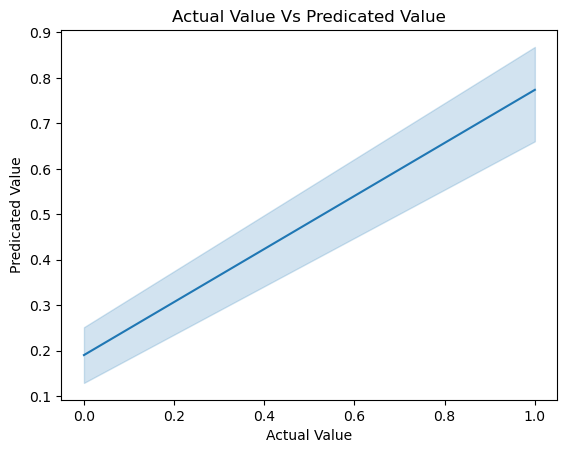

In [88]:
sns.lineplot(x=actual_value,y=predicted)
plt.xlabel("Actual Value")
plt.ylabel("Predicated Value")
plt.title("Actual Value Vs Predicated Value")

<Axes: >

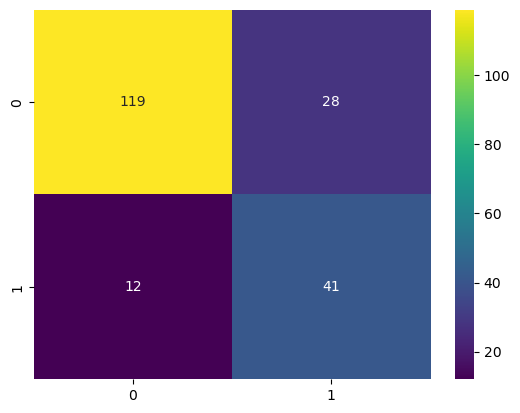

In [89]:
labels=["NO","YES"]
sns.heatmap(cnc,annot=True,fmt="d",cmap='viridis')
